# A clean version of Iris dataset.

In [30]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
sns.set_theme( # set some custom styles for visualization
    style='whitegrid',
    font_scale=1.2,
)

In [7]:
df = sns.load_dataset('iris') # loading the iris dataset to start working on it

In [ ]:
df.head() # to take a quick look at our data

In [ ]:
df.sample(3) # to take a quick look at three samples

## Data Preprocessing

In [ ]:
df.dtypes # getting types of our data

In [ ]:
df.select_dtypes('object').columns # detecting categorical features

In [ ]:
df.species.value_counts() # looking at values
sns.countplot(
    data=df,
    y='species',
)

In [20]:
df = df.astype( # converting the type of the species column
    {
        'species':'category',
    }
)

In [24]:
df.isna().sum() # detecting non-values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [22]:
df.describe() # is everything good?

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

In [ ]:
g = sns.PairGrid(df, hue='species') # creating a custom visualization which includes three different diagrams
g.map_upper(sns.histplot)
g.map_diag(sns.kdeplot, fill=True)
g.map_lower(sns.scatterplot)

In [ ]:
sns.heatmap( # checking correlations by using heatmap
    df.corr(),
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
)

In [31]:
def corr_plot(df): # defining a function to plot a custom heatmap
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 4))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1, vmin=-1,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5},
        annot=True,
    )
    
    return ax

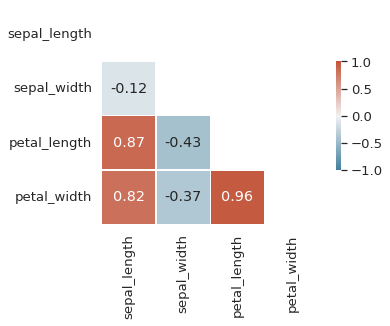

In [32]:
corr_plot(df) # using our function